2048 2048


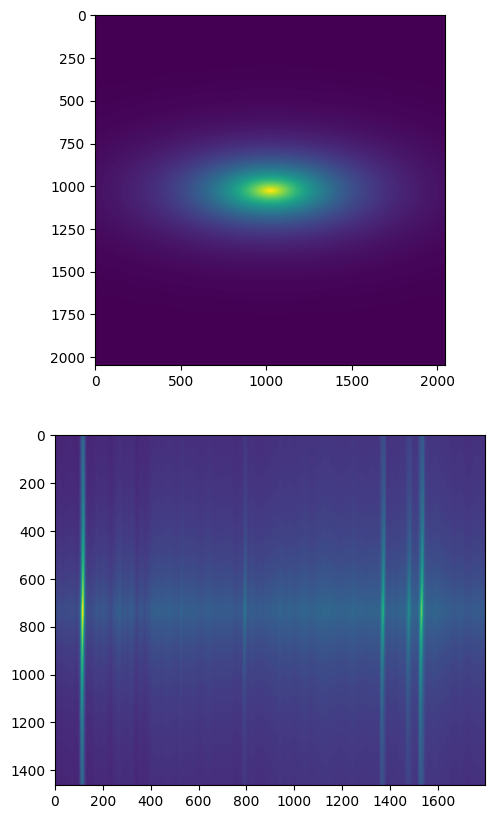

In [1]:
import astropy.io.fits as pyfits
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
u.imperial.enable()


galaxSpect = 'Galax_Spect.fits'
#pyfits.info(file_flux)
hdu = pyfits.open(galaxSpect)
IMG = hdu[1].data
LSS = hdu[2].data
headerIMG= hdu[1].header
headerLSS = hdu[2].header


def imgEnd(header):
    return header["CRVAL1"]+(header["NAXIS1"]-2)*header["CDELT1"]
    
xIMG = np.arange(headerIMG["CRVAL1"], imgEnd(headerIMG) + headerIMG["CDELT1"], headerIMG["CDELT1"])

yIMG = lambda x: IMG[x]

print(len(IMG), len(xIMG))
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
axes[0].imshow(IMG)
axes[1].imshow(LSS)

plt.show()


In [2]:
headerIMG
headerLSS


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                   32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 1800                                                  
NAXIS2  =                 1463                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
WCSAXES =                    1 / Number of coordinate axes                      
CRPIX1  =                  1.0 / Pixel coordinate of reference point            
CRPIX2  =                  1.0 / Pixel coordinate of reference point            
CDELT1  =  1.1745426707708E-10 / [m] Coordinate increment at reference point    
CDELT2  =            0.0013675 / [arcsec] Coordinate increment at reference poin
CUNIT1  = 'm'               

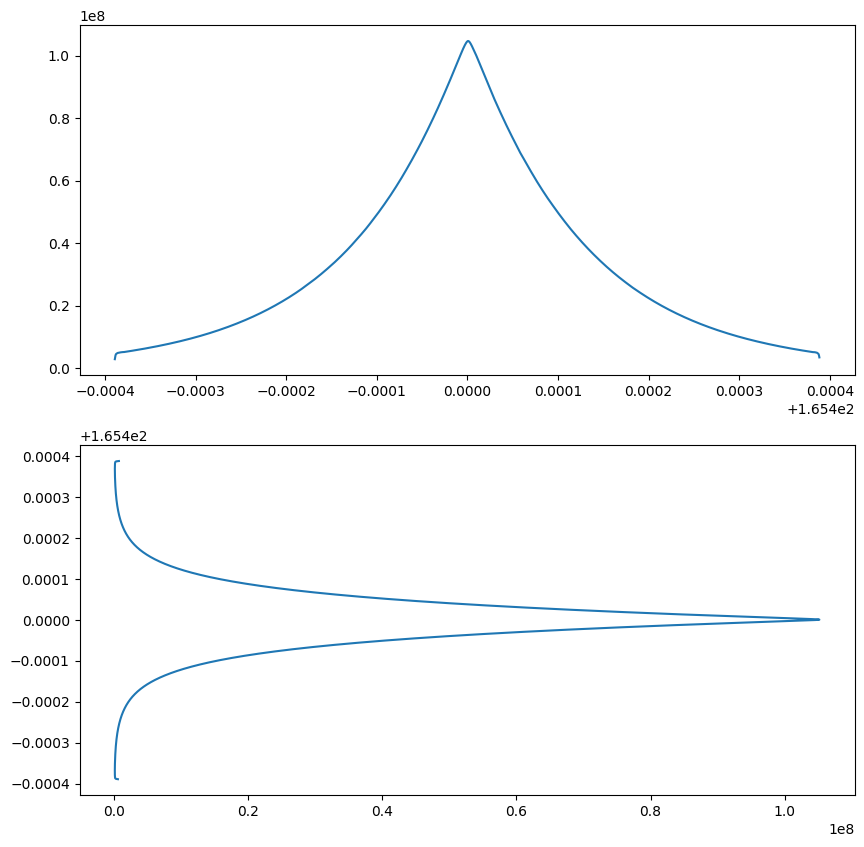

In [3]:
xStartIMG = headerIMG['CRVAL1'] - headerIMG['CRPIX1']*headerIMG['CDELT1']
xEndIMG = headerIMG['CRVAL1'] + (2047 - headerIMG['CRPIX1'])*headerIMG['CDELT1']
xDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT1'])

yStartIMG = headerIMG['CRVAL2'] - headerIMG['CRPIX2']*headerIMG['CDELT2']
yEndIMG = headerIMG['CRVAL2'] + (2047 - headerIMG['CRPIX2'])*headerIMG['CDELT2']
yDegIMG = np.arange(xStartIMG, xEndIMG, headerIMG['CDELT2'])

fix, axis = plt.subplots(2, 1, figsize=(10, 10))
#flux = np.nansum(IMG, 1)
axis[0].plot(xDegIMG, IMG[1024, :])
axis[1].plot(IMG[:, 1024], yDegIMG)

plt.show()

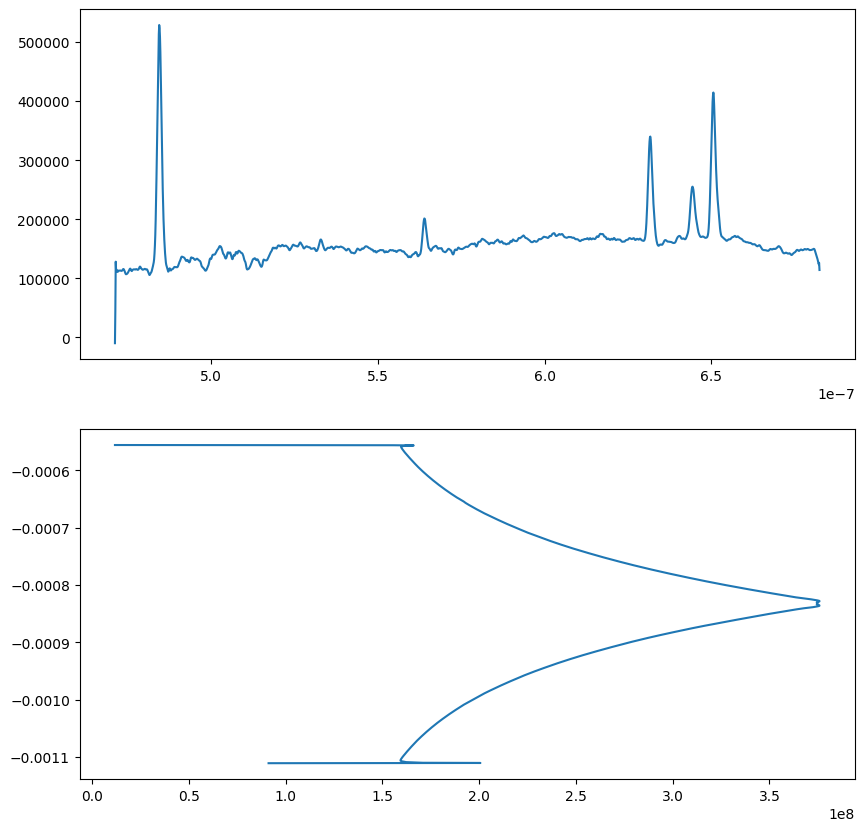

In [4]:
delX = (headerLSS['CDELT1'] * u.m)
delY = (headerLSS['CDELT2'] * u.arcsec).to(u.deg)

xStartLSS = (headerLSS['CRVAL1'] * u.m)
xEndLSS = ((xStartLSS + (1799 * delX)) * u.m)
xMLSS = np.arange(xStartLSS.value, xEndLSS.value, delX.value) * u.m

yStartLSS = (headerLSS['CRVAL2'] * u.arcsec).to(u.deg)
yEndLSS = ((yStartLSS.value + (1463 * delY.value)) *u.m)
yDegLSS = np.arange(yStartLSS.value, yEndLSS.value, delY.value) * u.deg


fig, axis = plt.subplots(2, 1, figsize=(10, 10))
axis[0].plot(xMLSS, LSS[900, :])

flux = np.nansum(LSS, 1)
axis[1].plot(flux, yDegLSS)

plt.show()


NameError: name 'xDegLSS' is not defined

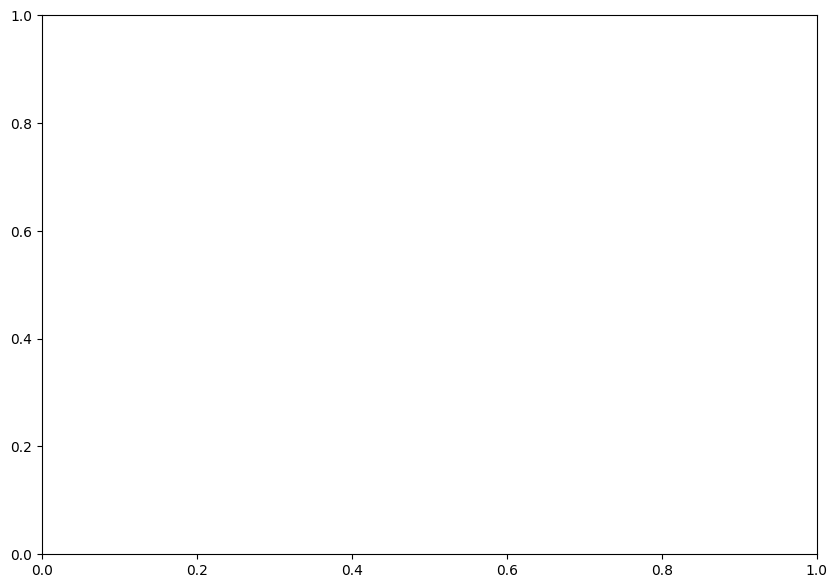

In [5]:
#Doppler Correction and Gauss-Fit

Z = 0.3


#z = femit/fobs - 1 => fobs = femit/(1+z)
def redshiftCorrection(wavelength):
    return(wavelength / (1+Z))


fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax.plot(xDegLSS, LSS[900, :])
ax.vlines(4.845e-7, 0, 550000, linestyles=':', colors='r', label='H-Beta?')
ax.vlines(6.32e-7, 0, 550000, linestyles=':', colors='gray', label='H?')
ax.vlines(6.51e-7, 0, 550000, linestyles=':', colors='grey', label='H?')
ax.legend()

#Approx redshifted emmision-wavelengths in nm:
line1 = 4.845
line2 = 6.32
line3 = 6.51

corrLine1 = redshiftCorrection(line1)
corrLine2 = redshiftCorrection(line2)
corrLine3 = redshiftCorrection(line3)

print(corrLine1, corrLine2, corrLine3)


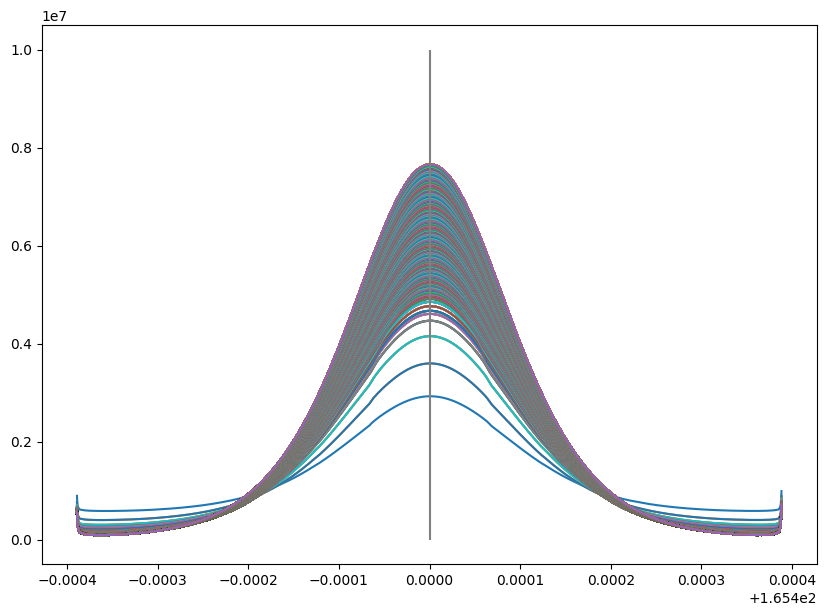

In [ ]:
#Rot.-Curve (wrong slices so far)
sliceSize = 150

fig, ax = plt.subplots(1, 1, figsize=(10, 7))
for i in range(len(yDegLSS)):
    ax.plot(xDegIMG, IMG[:, i:sliceSize])
ax.vlines(165.4, 0, 1e7, linestyles='-', colors='gray')
ax.set_xlabel='deg'
ax.set_ylabel='deg'
